<a href="https://colab.research.google.com/github/AnuLoveCoding/Anu.lovescoding/blob/main/Titanic_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [59]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
# statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
# datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Eploratory Data Analysis**

<Axes: ylabel='count'>

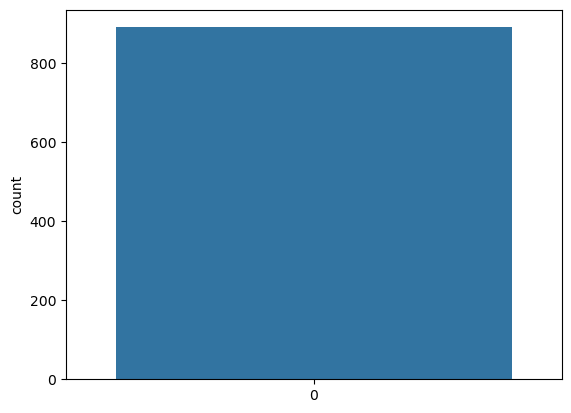

In [63]:
## categorical attributes
sns.countplot(train['Survived'])

<Axes: ylabel='count'>

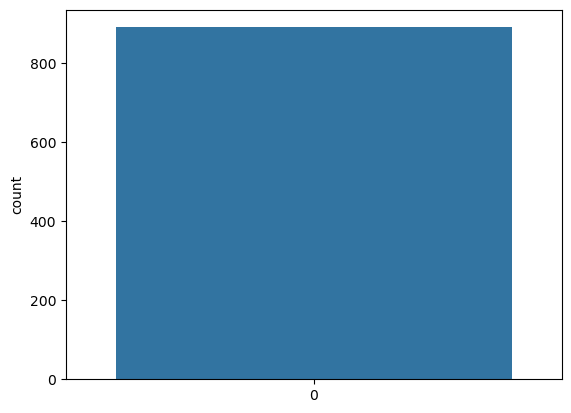

In [64]:
sns.countplot(train['Pclass'])

<Axes: ylabel='count'>

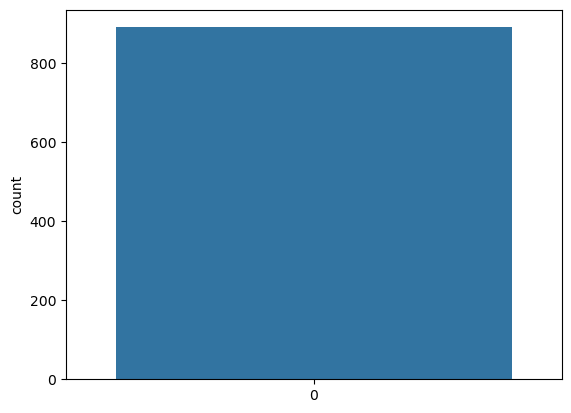

In [65]:
sns.countplot(train['Pclass'])

In [66]:
# numerical attributes

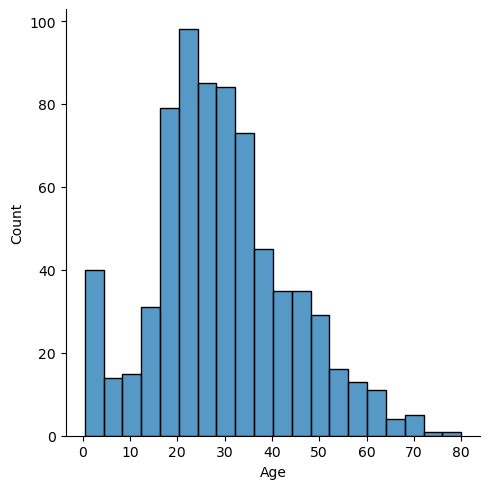

In [67]:
sns.displot(train['Age'])

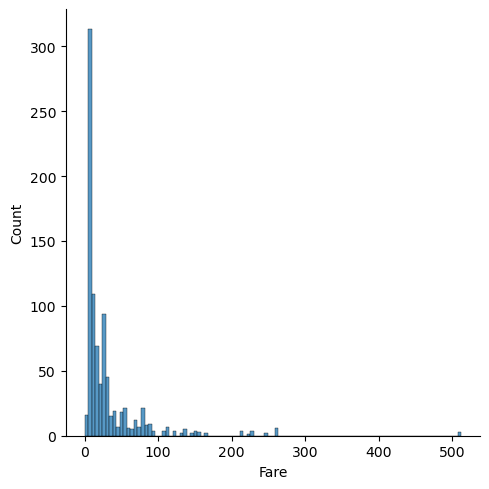

In [68]:
sns.displot(train['Fare'])

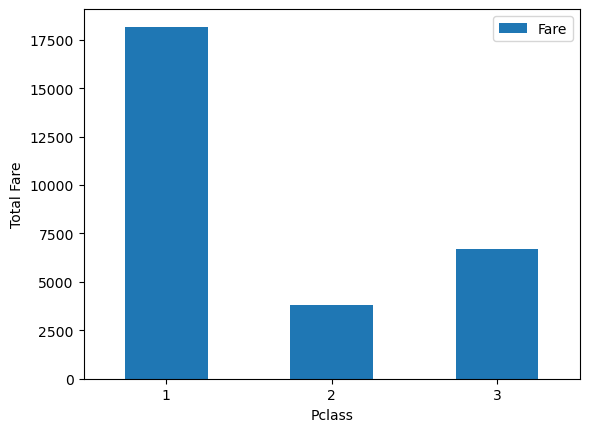

In [69]:
class_fare = train.pivot_table(index = 'Pclass', values = 'Fare', aggfunc = np. sum)
class_fare.plot(kind = 'bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation = 0)
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

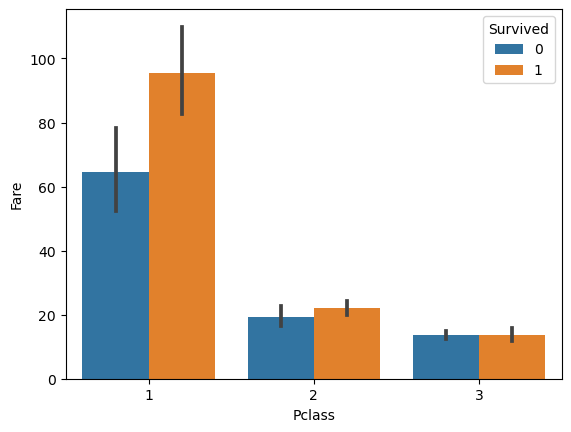

In [70]:
sns.barplot(data = train, x = 'Pclass', y = 'Fare', hue = 'Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

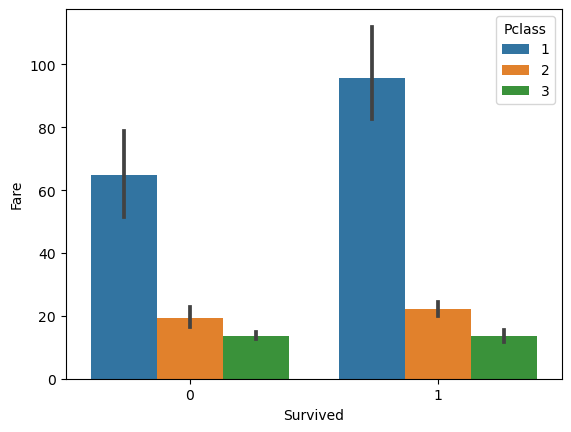

In [71]:
sns.barplot(data = train, x = 'Survived', y = 'Fare', hue = 'Pclass')

# Data Preprocessing


In [72]:
train_len = len(train)
# combine two dataframes
df = pd.concat([train, test], axis = 0)
df = df.reset_index(drop = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
train_len

891

In [74]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [75]:
## find the null values
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [76]:
# drop or delete the column
df= df.drop(columns = ['Cabin'], axis = 1)

In [77]:
df['Age'].mean()

29.881137667304014

In [78]:
# fill missing values using mean of that numerical columns
df['Age'] = df['Age'].fillna(df['Age']. mean())
df['Fare'] = df['Fare'].fillna(df['Fare']. mean())


In [79]:
df['Embarked'].mode()[0]

'S'

In [80]:
# fill missing values using mode of that categorical columns
df['Embarked'] = df['Embarked'].fillna(df['Embarked']. mode()[0])

# Log transform for uniform data distribution

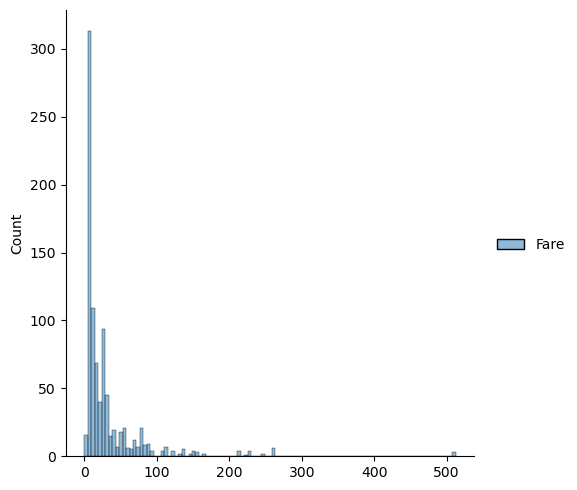

In [81]:
sns.displot([train['Fare']])

In [82]:
df['Fare'] = np.log(df['Fare'] + 1)

<Axes: ylabel='Density'>

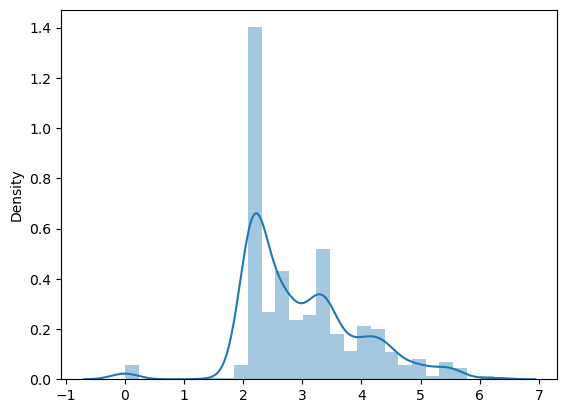

In [83]:
sns.distplot([df['Fare']])

# Coorelation Matrix

<Axes: >

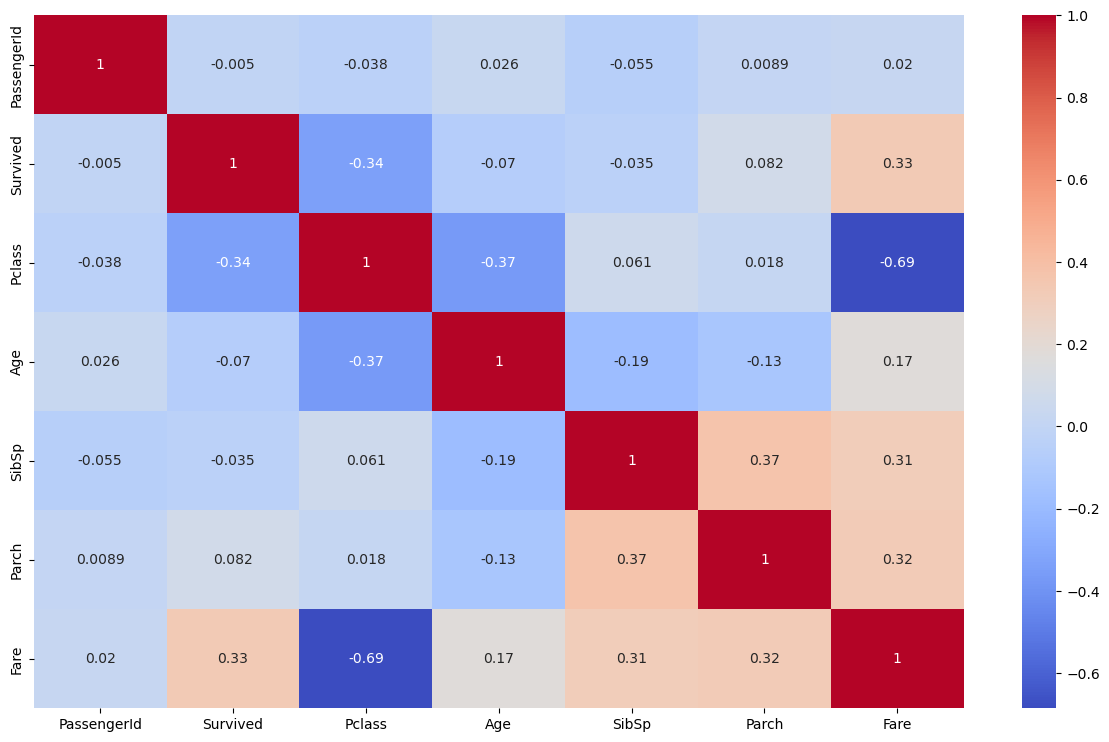

In [84]:
corr = df.corr()
plt.figure(figsize = (15,9))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

In [85]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


In [86]:
# drop unnecessary columns
df = df.drop(columns = ['Name','Ticket'], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


# Label Encoding

In [87]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex','Embarked']
le = LabelEncoder()


for col in cols:
  df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


# Train-Test Split

In [88]:
train = df.iloc[:train_len,:]
test = df.iloc[train_len: , :]

In [89]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [90]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [91]:
# input split
X = train.drop(columns = ['PassengerId','Survived'], axis = 1)
y = train['Survived']

In [92]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


# Model Traning

In [93]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
  model.fit(x_train, y_train)
  print('Accuracy:', model.score(x_test, y_test))

  score = cross_val_score(model, X, y)
  print('Cv Score:', np.mean(score))





In [94]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 0.8071748878923767
Cv Score: 0.7833971502102819


In [95]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.7443946188340808
Cv Score: 0.777810558031511


In [96]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.7892376681614349
Cv Score: 0.8148389931579938


In [97]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 0.8026905829596412
Cv Score: 0.7991212102190698


In [98]:
## from xgboost import XGBClassifier
## model = XGBClassifier()
## classify(model)

In [99]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(verbose =0)
classify(model)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [100]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
classify(model)

Learning rate set to 0.008672
0:	learn: 0.6869162	total: 2.21ms	remaining: 2.2s
1:	learn: 0.6815250	total: 4.54ms	remaining: 2.27s
2:	learn: 0.6759001	total: 6.99ms	remaining: 2.32s
3:	learn: 0.6702154	total: 9.11ms	remaining: 2.27s
4:	learn: 0.6671731	total: 10.2ms	remaining: 2.04s
5:	learn: 0.6620922	total: 12.4ms	remaining: 2.05s
6:	learn: 0.6563299	total: 14.6ms	remaining: 2.07s
7:	learn: 0.6531383	total: 16.1ms	remaining: 2s
8:	learn: 0.6475000	total: 18.4ms	remaining: 2.03s
9:	learn: 0.6421420	total: 20.5ms	remaining: 2.03s
10:	learn: 0.6370829	total: 23ms	remaining: 2.06s
11:	learn: 0.6323947	total: 25ms	remaining: 2.06s
12:	learn: 0.6280403	total: 27.2ms	remaining: 2.06s
13:	learn: 0.6238733	total: 28.9ms	remaining: 2.04s
14:	learn: 0.6187057	total: 31.1ms	remaining: 2.04s
15:	learn: 0.6140627	total: 33.2ms	remaining: 2.04s
16:	learn: 0.6092221	total: 35.2ms	remaining: 2.04s
17:	learn: 0.6057773	total: 37.3ms	remaining: 2.03s
18:	learn: 0.6012526	total: 39.4ms	remaining: 2.04s


203:	learn: 0.3857656	total: 380ms	remaining: 1.48s
204:	learn: 0.3856060	total: 381ms	remaining: 1.48s
205:	learn: 0.3852915	total: 383ms	remaining: 1.48s
206:	learn: 0.3848924	total: 385ms	remaining: 1.48s
207:	learn: 0.3847124	total: 387ms	remaining: 1.47s
208:	learn: 0.3845388	total: 389ms	remaining: 1.47s
209:	learn: 0.3842244	total: 391ms	remaining: 1.47s
210:	learn: 0.3837430	total: 393ms	remaining: 1.47s
211:	learn: 0.3835877	total: 396ms	remaining: 1.47s
212:	learn: 0.3832506	total: 398ms	remaining: 1.47s
213:	learn: 0.3830863	total: 400ms	remaining: 1.47s
214:	learn: 0.3828865	total: 402ms	remaining: 1.47s
215:	learn: 0.3825450	total: 404ms	remaining: 1.47s
216:	learn: 0.3823129	total: 406ms	remaining: 1.46s
217:	learn: 0.3820523	total: 408ms	remaining: 1.46s
218:	learn: 0.3817431	total: 410ms	remaining: 1.46s
219:	learn: 0.3814299	total: 412ms	remaining: 1.46s
220:	learn: 0.3810607	total: 414ms	remaining: 1.46s
221:	learn: 0.3806832	total: 416ms	remaining: 1.46s
222:	learn: 

409:	learn: 0.3455193	total: 770ms	remaining: 1.11s
410:	learn: 0.3454054	total: 773ms	remaining: 1.11s
411:	learn: 0.3453300	total: 775ms	remaining: 1.1s
412:	learn: 0.3450509	total: 777ms	remaining: 1.1s
413:	learn: 0.3449956	total: 779ms	remaining: 1.1s
414:	learn: 0.3448807	total: 781ms	remaining: 1.1s
415:	learn: 0.3448061	total: 783ms	remaining: 1.1s
416:	learn: 0.3447837	total: 784ms	remaining: 1.1s
417:	learn: 0.3446275	total: 787ms	remaining: 1.09s
418:	learn: 0.3444687	total: 789ms	remaining: 1.09s
419:	learn: 0.3442511	total: 790ms	remaining: 1.09s
420:	learn: 0.3441348	total: 792ms	remaining: 1.09s
421:	learn: 0.3440096	total: 794ms	remaining: 1.09s
422:	learn: 0.3438146	total: 796ms	remaining: 1.09s
423:	learn: 0.3437241	total: 798ms	remaining: 1.08s
424:	learn: 0.3436091	total: 800ms	remaining: 1.08s
425:	learn: 0.3434959	total: 802ms	remaining: 1.08s
426:	learn: 0.3433333	total: 804ms	remaining: 1.08s
427:	learn: 0.3432006	total: 806ms	remaining: 1.08s
428:	learn: 0.3429

626:	learn: 0.3183365	total: 1.18s	remaining: 701ms
627:	learn: 0.3182362	total: 1.18s	remaining: 699ms
628:	learn: 0.3180885	total: 1.18s	remaining: 697ms
629:	learn: 0.3179557	total: 1.18s	remaining: 696ms
630:	learn: 0.3178604	total: 1.19s	remaining: 694ms
631:	learn: 0.3177289	total: 1.19s	remaining: 692ms
632:	learn: 0.3175846	total: 1.19s	remaining: 690ms
633:	learn: 0.3175350	total: 1.19s	remaining: 689ms
634:	learn: 0.3174310	total: 1.2s	remaining: 687ms
635:	learn: 0.3172071	total: 1.2s	remaining: 685ms
636:	learn: 0.3171427	total: 1.2s	remaining: 684ms
637:	learn: 0.3171348	total: 1.2s	remaining: 682ms
638:	learn: 0.3171224	total: 1.2s	remaining: 679ms
639:	learn: 0.3170182	total: 1.2s	remaining: 678ms
640:	learn: 0.3168450	total: 1.21s	remaining: 676ms
641:	learn: 0.3167333	total: 1.21s	remaining: 674ms
642:	learn: 0.3166396	total: 1.21s	remaining: 672ms
643:	learn: 0.3166394	total: 1.21s	remaining: 670ms
644:	learn: 0.3164387	total: 1.22s	remaining: 669ms
645:	learn: 0.3163

823:	learn: 0.2944294	total: 1.57s	remaining: 335ms
824:	learn: 0.2943623	total: 1.57s	remaining: 333ms
825:	learn: 0.2943326	total: 1.57s	remaining: 331ms
826:	learn: 0.2941933	total: 1.57s	remaining: 329ms
827:	learn: 0.2941570	total: 1.57s	remaining: 327ms
828:	learn: 0.2941043	total: 1.58s	remaining: 325ms
829:	learn: 0.2939564	total: 1.58s	remaining: 323ms
830:	learn: 0.2938788	total: 1.58s	remaining: 322ms
831:	learn: 0.2936313	total: 1.58s	remaining: 320ms
832:	learn: 0.2935962	total: 1.58s	remaining: 318ms
833:	learn: 0.2934882	total: 1.59s	remaining: 316ms
834:	learn: 0.2934179	total: 1.59s	remaining: 314ms
835:	learn: 0.2932859	total: 1.59s	remaining: 312ms
836:	learn: 0.2931690	total: 1.59s	remaining: 310ms
837:	learn: 0.2930135	total: 1.59s	remaining: 308ms
838:	learn: 0.2928949	total: 1.6s	remaining: 307ms
839:	learn: 0.2926429	total: 1.6s	remaining: 305ms
840:	learn: 0.2925415	total: 1.6s	remaining: 303ms
841:	learn: 0.2924687	total: 1.6s	remaining: 301ms
842:	learn: 0.29

Accuracy: 0.8295964125560538
Learning rate set to 0.008911
0:	learn: 0.6868170	total: 1.95ms	remaining: 1.95s
1:	learn: 0.6813153	total: 3.65ms	remaining: 1.82s
2:	learn: 0.6754188	total: 5.59ms	remaining: 1.86s
3:	learn: 0.6691796	total: 7.67ms	remaining: 1.91s
4:	learn: 0.6645552	total: 8.97ms	remaining: 1.78s
5:	learn: 0.6596110	total: 10.9ms	remaining: 1.81s
6:	learn: 0.6547338	total: 12.9ms	remaining: 1.82s
7:	learn: 0.6494201	total: 14.9ms	remaining: 1.84s
8:	learn: 0.6451688	total: 16.2ms	remaining: 1.78s
9:	learn: 0.6407221	total: 17.8ms	remaining: 1.76s
10:	learn: 0.6361618	total: 19.6ms	remaining: 1.76s
11:	learn: 0.6308959	total: 22.3ms	remaining: 1.84s
12:	learn: 0.6256709	total: 25.1ms	remaining: 1.9s
13:	learn: 0.6205339	total: 27.3ms	remaining: 1.92s
14:	learn: 0.6161988	total: 29.5ms	remaining: 1.94s
15:	learn: 0.6127778	total: 30.9ms	remaining: 1.9s
16:	learn: 0.6080314	total: 33ms	remaining: 1.91s
17:	learn: 0.6038142	total: 35.2ms	remaining: 1.92s
18:	learn: 0.599565

184:	learn: 0.3841367	total: 353ms	remaining: 1.55s
185:	learn: 0.3836844	total: 355ms	remaining: 1.55s
186:	learn: 0.3831576	total: 357ms	remaining: 1.55s
187:	learn: 0.3828920	total: 359ms	remaining: 1.55s
188:	learn: 0.3827768	total: 361ms	remaining: 1.55s
189:	learn: 0.3824813	total: 363ms	remaining: 1.55s
190:	learn: 0.3821892	total: 366ms	remaining: 1.55s
191:	learn: 0.3818524	total: 368ms	remaining: 1.55s
192:	learn: 0.3815386	total: 370ms	remaining: 1.54s
193:	learn: 0.3810822	total: 372ms	remaining: 1.54s
194:	learn: 0.3806131	total: 374ms	remaining: 1.54s
195:	learn: 0.3802951	total: 376ms	remaining: 1.54s
196:	learn: 0.3798240	total: 378ms	remaining: 1.54s
197:	learn: 0.3794011	total: 380ms	remaining: 1.54s
198:	learn: 0.3789774	total: 382ms	remaining: 1.53s
199:	learn: 0.3789164	total: 383ms	remaining: 1.53s
200:	learn: 0.3786924	total: 385ms	remaining: 1.53s
201:	learn: 0.3783215	total: 387ms	remaining: 1.53s
202:	learn: 0.3780442	total: 389ms	remaining: 1.52s
203:	learn: 

378:	learn: 0.3436828	total: 726ms	remaining: 1.19s
379:	learn: 0.3436388	total: 727ms	remaining: 1.19s
380:	learn: 0.3435043	total: 730ms	remaining: 1.19s
381:	learn: 0.3434204	total: 732ms	remaining: 1.18s
382:	learn: 0.3431837	total: 734ms	remaining: 1.18s
383:	learn: 0.3431175	total: 736ms	remaining: 1.18s
384:	learn: 0.3429485	total: 738ms	remaining: 1.18s
385:	learn: 0.3427591	total: 740ms	remaining: 1.18s
386:	learn: 0.3426035	total: 742ms	remaining: 1.18s
387:	learn: 0.3423866	total: 744ms	remaining: 1.17s
388:	learn: 0.3422688	total: 746ms	remaining: 1.17s
389:	learn: 0.3421633	total: 748ms	remaining: 1.17s
390:	learn: 0.3421120	total: 750ms	remaining: 1.17s
391:	learn: 0.3419996	total: 752ms	remaining: 1.17s
392:	learn: 0.3417076	total: 754ms	remaining: 1.17s
393:	learn: 0.3415487	total: 756ms	remaining: 1.16s
394:	learn: 0.3414314	total: 758ms	remaining: 1.16s
395:	learn: 0.3412339	total: 760ms	remaining: 1.16s
396:	learn: 0.3409512	total: 762ms	remaining: 1.16s
397:	learn: 

548:	learn: 0.3222698	total: 1.11s	remaining: 912ms
549:	learn: 0.3221287	total: 1.11s	remaining: 910ms
550:	learn: 0.3220722	total: 1.11s	remaining: 908ms
551:	learn: 0.3220344	total: 1.11s	remaining: 906ms
552:	learn: 0.3219326	total: 1.12s	remaining: 904ms
553:	learn: 0.3218461	total: 1.12s	remaining: 902ms
554:	learn: 0.3216249	total: 1.12s	remaining: 900ms
555:	learn: 0.3215362	total: 1.12s	remaining: 898ms
556:	learn: 0.3214393	total: 1.13s	remaining: 896ms
557:	learn: 0.3213417	total: 1.13s	remaining: 894ms
558:	learn: 0.3212017	total: 1.13s	remaining: 892ms
559:	learn: 0.3211418	total: 1.13s	remaining: 890ms
560:	learn: 0.3210482	total: 1.14s	remaining: 888ms
561:	learn: 0.3210478	total: 1.14s	remaining: 886ms
562:	learn: 0.3209161	total: 1.14s	remaining: 884ms
563:	learn: 0.3207478	total: 1.14s	remaining: 882ms
564:	learn: 0.3206599	total: 1.14s	remaining: 880ms
565:	learn: 0.3205236	total: 1.15s	remaining: 878ms
566:	learn: 0.3205164	total: 1.15s	remaining: 875ms
567:	learn: 

726:	learn: 0.3015469	total: 1.49s	remaining: 561ms
727:	learn: 0.3014472	total: 1.5s	remaining: 559ms
728:	learn: 0.3014155	total: 1.5s	remaining: 557ms
729:	learn: 0.3013546	total: 1.5s	remaining: 555ms
730:	learn: 0.3012909	total: 1.5s	remaining: 553ms
731:	learn: 0.3012799	total: 1.5s	remaining: 551ms
732:	learn: 0.3010924	total: 1.51s	remaining: 549ms
733:	learn: 0.3009699	total: 1.51s	remaining: 547ms
734:	learn: 0.3008854	total: 1.51s	remaining: 545ms
735:	learn: 0.3008776	total: 1.51s	remaining: 542ms
736:	learn: 0.3006998	total: 1.51s	remaining: 540ms
737:	learn: 0.3005733	total: 1.52s	remaining: 539ms
738:	learn: 0.3004936	total: 1.52s	remaining: 537ms
739:	learn: 0.3004019	total: 1.52s	remaining: 535ms
740:	learn: 0.3002106	total: 1.52s	remaining: 532ms
741:	learn: 0.3000587	total: 1.52s	remaining: 530ms
742:	learn: 0.3000171	total: 1.53s	remaining: 528ms
743:	learn: 0.2998624	total: 1.53s	remaining: 526ms
744:	learn: 0.2997474	total: 1.53s	remaining: 524ms
745:	learn: 0.299

900:	learn: 0.2811141	total: 1.87s	remaining: 205ms
901:	learn: 0.2808924	total: 1.87s	remaining: 203ms
902:	learn: 0.2808617	total: 1.87s	remaining: 201ms
903:	learn: 0.2807733	total: 1.87s	remaining: 199ms
904:	learn: 0.2807327	total: 1.88s	remaining: 197ms
905:	learn: 0.2805120	total: 1.88s	remaining: 195ms
906:	learn: 0.2804469	total: 1.88s	remaining: 193ms
907:	learn: 0.2803433	total: 1.88s	remaining: 191ms
908:	learn: 0.2803248	total: 1.89s	remaining: 189ms
909:	learn: 0.2802977	total: 1.89s	remaining: 187ms
910:	learn: 0.2801998	total: 1.89s	remaining: 185ms
911:	learn: 0.2800504	total: 1.89s	remaining: 183ms
912:	learn: 0.2798907	total: 1.9s	remaining: 181ms
913:	learn: 0.2798110	total: 1.9s	remaining: 179ms
914:	learn: 0.2797115	total: 1.9s	remaining: 177ms
915:	learn: 0.2795930	total: 1.9s	remaining: 175ms
916:	learn: 0.2795038	total: 1.91s	remaining: 172ms
917:	learn: 0.2794190	total: 1.91s	remaining: 171ms
918:	learn: 0.2793618	total: 1.91s	remaining: 168ms
919:	learn: 0.27

62:	learn: 0.4763547	total: 118ms	remaining: 1.75s
63:	learn: 0.4738097	total: 121ms	remaining: 1.76s
64:	learn: 0.4728893	total: 122ms	remaining: 1.75s
65:	learn: 0.4711019	total: 124ms	remaining: 1.76s
66:	learn: 0.4689870	total: 126ms	remaining: 1.76s
67:	learn: 0.4670722	total: 129ms	remaining: 1.76s
68:	learn: 0.4663957	total: 130ms	remaining: 1.75s
69:	learn: 0.4642323	total: 132ms	remaining: 1.76s
70:	learn: 0.4627710	total: 135ms	remaining: 1.76s
71:	learn: 0.4612190	total: 137ms	remaining: 1.77s
72:	learn: 0.4594374	total: 139ms	remaining: 1.77s
73:	learn: 0.4581145	total: 141ms	remaining: 1.77s
74:	learn: 0.4563291	total: 144ms	remaining: 1.78s
75:	learn: 0.4547786	total: 147ms	remaining: 1.78s
76:	learn: 0.4531341	total: 149ms	remaining: 1.78s
77:	learn: 0.4516368	total: 151ms	remaining: 1.78s
78:	learn: 0.4498457	total: 153ms	remaining: 1.78s
79:	learn: 0.4482629	total: 156ms	remaining: 1.79s
80:	learn: 0.4469234	total: 158ms	remaining: 1.79s
81:	learn: 0.4454511	total: 161

236:	learn: 0.3556187	total: 518ms	remaining: 1.67s
237:	learn: 0.3553907	total: 521ms	remaining: 1.67s
238:	learn: 0.3551959	total: 523ms	remaining: 1.67s
239:	learn: 0.3549159	total: 525ms	remaining: 1.66s
240:	learn: 0.3548903	total: 526ms	remaining: 1.66s
241:	learn: 0.3546608	total: 529ms	remaining: 1.66s
242:	learn: 0.3545027	total: 531ms	remaining: 1.65s
243:	learn: 0.3543174	total: 533ms	remaining: 1.65s
244:	learn: 0.3540437	total: 535ms	remaining: 1.65s
245:	learn: 0.3538516	total: 537ms	remaining: 1.65s
246:	learn: 0.3535925	total: 540ms	remaining: 1.65s
247:	learn: 0.3535691	total: 542ms	remaining: 1.64s
248:	learn: 0.3534311	total: 544ms	remaining: 1.64s
249:	learn: 0.3529966	total: 547ms	remaining: 1.64s
250:	learn: 0.3526735	total: 550ms	remaining: 1.64s
251:	learn: 0.3523487	total: 554ms	remaining: 1.64s
252:	learn: 0.3521133	total: 557ms	remaining: 1.64s
253:	learn: 0.3519207	total: 559ms	remaining: 1.64s
254:	learn: 0.3516901	total: 562ms	remaining: 1.64s
255:	learn: 

403:	learn: 0.3240954	total: 919ms	remaining: 1.35s
404:	learn: 0.3239524	total: 921ms	remaining: 1.35s
405:	learn: 0.3239268	total: 923ms	remaining: 1.35s
406:	learn: 0.3238560	total: 925ms	remaining: 1.35s
407:	learn: 0.3237914	total: 927ms	remaining: 1.34s
408:	learn: 0.3237566	total: 929ms	remaining: 1.34s
409:	learn: 0.3236643	total: 931ms	remaining: 1.34s
410:	learn: 0.3235006	total: 933ms	remaining: 1.34s
411:	learn: 0.3232480	total: 935ms	remaining: 1.33s
412:	learn: 0.3231811	total: 938ms	remaining: 1.33s
413:	learn: 0.3229400	total: 940ms	remaining: 1.33s
414:	learn: 0.3229255	total: 942ms	remaining: 1.33s
415:	learn: 0.3227988	total: 944ms	remaining: 1.32s
416:	learn: 0.3227907	total: 946ms	remaining: 1.32s
417:	learn: 0.3227305	total: 948ms	remaining: 1.32s
418:	learn: 0.3226262	total: 950ms	remaining: 1.32s
419:	learn: 0.3224345	total: 952ms	remaining: 1.31s
420:	learn: 0.3222881	total: 954ms	remaining: 1.31s
421:	learn: 0.3221486	total: 956ms	remaining: 1.31s
422:	learn: 

592:	learn: 0.3008406	total: 1.29s	remaining: 889ms
593:	learn: 0.3007490	total: 1.3s	remaining: 886ms
594:	learn: 0.3007359	total: 1.3s	remaining: 884ms
595:	learn: 0.3007007	total: 1.3s	remaining: 881ms
596:	learn: 0.3006396	total: 1.3s	remaining: 879ms
597:	learn: 0.3004165	total: 1.3s	remaining: 877ms
598:	learn: 0.3004006	total: 1.31s	remaining: 875ms
599:	learn: 0.3002671	total: 1.31s	remaining: 873ms
600:	learn: 0.2999946	total: 1.31s	remaining: 871ms
601:	learn: 0.2998742	total: 1.31s	remaining: 869ms
602:	learn: 0.2997604	total: 1.32s	remaining: 867ms
603:	learn: 0.2997504	total: 1.32s	remaining: 864ms
604:	learn: 0.2996441	total: 1.32s	remaining: 862ms
605:	learn: 0.2996340	total: 1.32s	remaining: 859ms
606:	learn: 0.2995196	total: 1.32s	remaining: 857ms
607:	learn: 0.2994547	total: 1.32s	remaining: 855ms
608:	learn: 0.2993383	total: 1.33s	remaining: 853ms
609:	learn: 0.2991991	total: 1.33s	remaining: 851ms
610:	learn: 0.2990965	total: 1.33s	remaining: 848ms
611:	learn: 0.298

771:	learn: 0.2813156	total: 1.67s	remaining: 494ms
772:	learn: 0.2809588	total: 1.68s	remaining: 492ms
773:	learn: 0.2808939	total: 1.68s	remaining: 490ms
774:	learn: 0.2808425	total: 1.68s	remaining: 488ms
775:	learn: 0.2807381	total: 1.68s	remaining: 486ms
776:	learn: 0.2806728	total: 1.68s	remaining: 483ms
777:	learn: 0.2805023	total: 1.69s	remaining: 481ms
778:	learn: 0.2804101	total: 1.69s	remaining: 479ms
779:	learn: 0.2803958	total: 1.69s	remaining: 477ms
780:	learn: 0.2803611	total: 1.69s	remaining: 475ms
781:	learn: 0.2803068	total: 1.69s	remaining: 472ms
782:	learn: 0.2801377	total: 1.7s	remaining: 470ms
783:	learn: 0.2800811	total: 1.7s	remaining: 469ms
784:	learn: 0.2799295	total: 1.7s	remaining: 466ms
785:	learn: 0.2798091	total: 1.71s	remaining: 465ms
786:	learn: 0.2796856	total: 1.71s	remaining: 463ms
787:	learn: 0.2794098	total: 1.71s	remaining: 460ms
788:	learn: 0.2793537	total: 1.71s	remaining: 458ms
789:	learn: 0.2793117	total: 1.72s	remaining: 456ms
790:	learn: 0.2

952:	learn: 0.2612111	total: 2.06s	remaining: 102ms
953:	learn: 0.2610355	total: 2.06s	remaining: 99.4ms
954:	learn: 0.2608990	total: 2.06s	remaining: 97.2ms
955:	learn: 0.2607624	total: 2.06s	remaining: 95.1ms
956:	learn: 0.2605672	total: 2.07s	remaining: 92.9ms
957:	learn: 0.2604515	total: 2.07s	remaining: 90.7ms
958:	learn: 0.2602969	total: 2.07s	remaining: 88.6ms
959:	learn: 0.2602664	total: 2.07s	remaining: 86.4ms
960:	learn: 0.2601897	total: 2.08s	remaining: 84.3ms
961:	learn: 0.2600948	total: 2.08s	remaining: 82.1ms
962:	learn: 0.2600007	total: 2.08s	remaining: 80ms
963:	learn: 0.2599006	total: 2.08s	remaining: 77.8ms
964:	learn: 0.2596370	total: 2.08s	remaining: 75.6ms
965:	learn: 0.2595095	total: 2.09s	remaining: 73.5ms
966:	learn: 0.2593765	total: 2.09s	remaining: 71.3ms
967:	learn: 0.2592748	total: 2.09s	remaining: 69.1ms
968:	learn: 0.2592246	total: 2.09s	remaining: 67ms
969:	learn: 0.2591680	total: 2.1s	remaining: 64.8ms
970:	learn: 0.2591070	total: 2.1s	remaining: 62.6ms


111:	learn: 0.4298747	total: 249ms	remaining: 1.97s
112:	learn: 0.4295962	total: 252ms	remaining: 1.98s
113:	learn: 0.4288420	total: 256ms	remaining: 1.99s
114:	learn: 0.4279567	total: 261ms	remaining: 2.01s
115:	learn: 0.4270242	total: 266ms	remaining: 2.03s
116:	learn: 0.4262130	total: 271ms	remaining: 2.04s
117:	learn: 0.4256832	total: 275ms	remaining: 2.05s
118:	learn: 0.4249579	total: 279ms	remaining: 2.06s
119:	learn: 0.4241027	total: 282ms	remaining: 2.07s
120:	learn: 0.4234522	total: 285ms	remaining: 2.07s
121:	learn: 0.4229549	total: 288ms	remaining: 2.07s
122:	learn: 0.4221079	total: 290ms	remaining: 2.07s
123:	learn: 0.4218494	total: 291ms	remaining: 2.06s
124:	learn: 0.4216007	total: 293ms	remaining: 2.05s
125:	learn: 0.4210791	total: 295ms	remaining: 2.05s
126:	learn: 0.4208226	total: 297ms	remaining: 2.04s
127:	learn: 0.4202865	total: 298ms	remaining: 2.03s
128:	learn: 0.4200862	total: 299ms	remaining: 2.02s
129:	learn: 0.4195492	total: 301ms	remaining: 2.02s
130:	learn: 

293:	learn: 0.3670242	total: 637ms	remaining: 1.53s
294:	learn: 0.3667083	total: 639ms	remaining: 1.53s
295:	learn: 0.3665458	total: 641ms	remaining: 1.52s
296:	learn: 0.3663889	total: 643ms	remaining: 1.52s
297:	learn: 0.3662871	total: 645ms	remaining: 1.52s
298:	learn: 0.3661130	total: 647ms	remaining: 1.52s
299:	learn: 0.3660256	total: 649ms	remaining: 1.51s
300:	learn: 0.3658961	total: 652ms	remaining: 1.51s
301:	learn: 0.3657941	total: 655ms	remaining: 1.51s
302:	learn: 0.3656245	total: 657ms	remaining: 1.51s
303:	learn: 0.3654235	total: 658ms	remaining: 1.51s
304:	learn: 0.3654137	total: 660ms	remaining: 1.5s
305:	learn: 0.3652819	total: 662ms	remaining: 1.5s
306:	learn: 0.3651962	total: 663ms	remaining: 1.5s
307:	learn: 0.3650865	total: 665ms	remaining: 1.49s
308:	learn: 0.3648668	total: 667ms	remaining: 1.49s
309:	learn: 0.3647574	total: 670ms	remaining: 1.49s
310:	learn: 0.3647280	total: 672ms	remaining: 1.49s
311:	learn: 0.3646052	total: 674ms	remaining: 1.49s
312:	learn: 0.3

479:	learn: 0.3412801	total: 1.01s	remaining: 1.09s
480:	learn: 0.3412107	total: 1.01s	remaining: 1.09s
481:	learn: 0.3411527	total: 1.01s	remaining: 1.09s
482:	learn: 0.3411485	total: 1.01s	remaining: 1.09s
483:	learn: 0.3410487	total: 1.02s	remaining: 1.08s
484:	learn: 0.3408656	total: 1.02s	remaining: 1.08s
485:	learn: 0.3407648	total: 1.02s	remaining: 1.08s
486:	learn: 0.3406673	total: 1.02s	remaining: 1.08s
487:	learn: 0.3406387	total: 1.02s	remaining: 1.08s
488:	learn: 0.3405901	total: 1.03s	remaining: 1.07s
489:	learn: 0.3404711	total: 1.03s	remaining: 1.07s
490:	learn: 0.3401342	total: 1.03s	remaining: 1.07s
491:	learn: 0.3400813	total: 1.03s	remaining: 1.07s
492:	learn: 0.3400111	total: 1.04s	remaining: 1.06s
493:	learn: 0.3399944	total: 1.04s	remaining: 1.06s
494:	learn: 0.3398168	total: 1.04s	remaining: 1.06s
495:	learn: 0.3396188	total: 1.04s	remaining: 1.06s
496:	learn: 0.3394139	total: 1.04s	remaining: 1.06s
497:	learn: 0.3393804	total: 1.05s	remaining: 1.05s
498:	learn: 

664:	learn: 0.3202316	total: 1.39s	remaining: 699ms
665:	learn: 0.3202062	total: 1.39s	remaining: 697ms
666:	learn: 0.3200923	total: 1.39s	remaining: 696ms
667:	learn: 0.3199971	total: 1.4s	remaining: 694ms
668:	learn: 0.3198786	total: 1.4s	remaining: 692ms
669:	learn: 0.3197611	total: 1.4s	remaining: 690ms
670:	learn: 0.3197419	total: 1.4s	remaining: 687ms
671:	learn: 0.3196486	total: 1.4s	remaining: 685ms
672:	learn: 0.3195053	total: 1.41s	remaining: 683ms
673:	learn: 0.3194466	total: 1.41s	remaining: 681ms
674:	learn: 0.3193077	total: 1.41s	remaining: 679ms
675:	learn: 0.3190908	total: 1.41s	remaining: 677ms
676:	learn: 0.3190404	total: 1.41s	remaining: 675ms
677:	learn: 0.3190053	total: 1.42s	remaining: 673ms
678:	learn: 0.3189103	total: 1.42s	remaining: 671ms
679:	learn: 0.3188692	total: 1.42s	remaining: 669ms
680:	learn: 0.3188326	total: 1.42s	remaining: 667ms
681:	learn: 0.3186639	total: 1.43s	remaining: 665ms
682:	learn: 0.3186188	total: 1.43s	remaining: 663ms
683:	learn: 0.318

893:	learn: 0.2964722	total: 1.96s	remaining: 232ms
894:	learn: 0.2963991	total: 1.96s	remaining: 230ms
895:	learn: 0.2962780	total: 1.96s	remaining: 228ms
896:	learn: 0.2961402	total: 1.96s	remaining: 225ms
897:	learn: 0.2960131	total: 1.96s	remaining: 223ms
898:	learn: 0.2959295	total: 1.97s	remaining: 221ms
899:	learn: 0.2956267	total: 1.97s	remaining: 219ms
900:	learn: 0.2954765	total: 1.97s	remaining: 217ms
901:	learn: 0.2953954	total: 1.97s	remaining: 214ms
902:	learn: 0.2953807	total: 1.97s	remaining: 212ms
903:	learn: 0.2952828	total: 1.98s	remaining: 210ms
904:	learn: 0.2952043	total: 1.98s	remaining: 208ms
905:	learn: 0.2951611	total: 1.98s	remaining: 206ms
906:	learn: 0.2949073	total: 1.98s	remaining: 203ms
907:	learn: 0.2948094	total: 1.99s	remaining: 201ms
908:	learn: 0.2946825	total: 1.99s	remaining: 199ms
909:	learn: 0.2946338	total: 1.99s	remaining: 197ms
910:	learn: 0.2944279	total: 1.99s	remaining: 195ms
911:	learn: 0.2943083	total: 1.99s	remaining: 192ms
912:	learn: 

57:	learn: 0.4927516	total: 117ms	remaining: 1.89s
58:	learn: 0.4913432	total: 119ms	remaining: 1.89s
59:	learn: 0.4893783	total: 121ms	remaining: 1.9s
60:	learn: 0.4879187	total: 123ms	remaining: 1.89s
61:	learn: 0.4857526	total: 125ms	remaining: 1.89s
62:	learn: 0.4838406	total: 127ms	remaining: 1.89s
63:	learn: 0.4819714	total: 129ms	remaining: 1.89s
64:	learn: 0.4800414	total: 131ms	remaining: 1.89s
65:	learn: 0.4783060	total: 133ms	remaining: 1.88s
66:	learn: 0.4763856	total: 136ms	remaining: 1.89s
67:	learn: 0.4743499	total: 138ms	remaining: 1.89s
68:	learn: 0.4729324	total: 140ms	remaining: 1.88s
69:	learn: 0.4715776	total: 141ms	remaining: 1.88s
70:	learn: 0.4697903	total: 143ms	remaining: 1.87s
71:	learn: 0.4680967	total: 146ms	remaining: 1.88s
72:	learn: 0.4664202	total: 148ms	remaining: 1.88s
73:	learn: 0.4646480	total: 150ms	remaining: 1.88s
74:	learn: 0.4635052	total: 152ms	remaining: 1.88s
75:	learn: 0.4622087	total: 154ms	remaining: 1.87s
76:	learn: 0.4604173	total: 156m

233:	learn: 0.3742484	total: 502ms	remaining: 1.64s
234:	learn: 0.3740123	total: 505ms	remaining: 1.64s
235:	learn: 0.3737195	total: 508ms	remaining: 1.64s
236:	learn: 0.3733493	total: 510ms	remaining: 1.64s
237:	learn: 0.3733205	total: 511ms	remaining: 1.64s
238:	learn: 0.3729350	total: 513ms	remaining: 1.63s
239:	learn: 0.3726352	total: 516ms	remaining: 1.63s
240:	learn: 0.3724489	total: 518ms	remaining: 1.63s
241:	learn: 0.3721880	total: 520ms	remaining: 1.63s
242:	learn: 0.3720525	total: 522ms	remaining: 1.63s
243:	learn: 0.3718931	total: 524ms	remaining: 1.62s
244:	learn: 0.3714300	total: 527ms	remaining: 1.62s
245:	learn: 0.3712255	total: 529ms	remaining: 1.62s
246:	learn: 0.3711645	total: 531ms	remaining: 1.62s
247:	learn: 0.3708260	total: 533ms	remaining: 1.61s
248:	learn: 0.3704155	total: 536ms	remaining: 1.61s
249:	learn: 0.3702176	total: 538ms	remaining: 1.61s
250:	learn: 0.3699985	total: 540ms	remaining: 1.61s
251:	learn: 0.3696880	total: 542ms	remaining: 1.61s
252:	learn: 

473:	learn: 0.3348083	total: 1.06s	remaining: 1.18s
474:	learn: 0.3347028	total: 1.06s	remaining: 1.17s
475:	learn: 0.3345276	total: 1.06s	remaining: 1.17s
476:	learn: 0.3344260	total: 1.07s	remaining: 1.17s
477:	learn: 0.3342417	total: 1.07s	remaining: 1.17s
478:	learn: 0.3340914	total: 1.07s	remaining: 1.17s
479:	learn: 0.3340248	total: 1.07s	remaining: 1.16s
480:	learn: 0.3339338	total: 1.08s	remaining: 1.16s
481:	learn: 0.3337863	total: 1.08s	remaining: 1.16s
482:	learn: 0.3335704	total: 1.08s	remaining: 1.16s
483:	learn: 0.3334345	total: 1.08s	remaining: 1.16s
484:	learn: 0.3332796	total: 1.08s	remaining: 1.15s
485:	learn: 0.3332291	total: 1.09s	remaining: 1.15s
486:	learn: 0.3330573	total: 1.09s	remaining: 1.15s
487:	learn: 0.3327652	total: 1.09s	remaining: 1.15s
488:	learn: 0.3326996	total: 1.09s	remaining: 1.14s
489:	learn: 0.3325024	total: 1.1s	remaining: 1.14s
490:	learn: 0.3324088	total: 1.1s	remaining: 1.14s
491:	learn: 0.3323719	total: 1.1s	remaining: 1.14s
492:	learn: 0.3

641:	learn: 0.3136195	total: 1.43s	remaining: 800ms
642:	learn: 0.3135359	total: 1.44s	remaining: 798ms
643:	learn: 0.3135095	total: 1.44s	remaining: 796ms
644:	learn: 0.3134177	total: 1.44s	remaining: 794ms
645:	learn: 0.3132704	total: 1.45s	remaining: 792ms
646:	learn: 0.3132351	total: 1.45s	remaining: 789ms
647:	learn: 0.3131689	total: 1.45s	remaining: 787ms
648:	learn: 0.3131470	total: 1.45s	remaining: 785ms
649:	learn: 0.3130488	total: 1.45s	remaining: 783ms
650:	learn: 0.3129123	total: 1.46s	remaining: 781ms
651:	learn: 0.3128115	total: 1.46s	remaining: 779ms
652:	learn: 0.3127137	total: 1.46s	remaining: 777ms
653:	learn: 0.3125890	total: 1.47s	remaining: 776ms
654:	learn: 0.3125269	total: 1.47s	remaining: 773ms
655:	learn: 0.3124286	total: 1.47s	remaining: 772ms
656:	learn: 0.3123291	total: 1.47s	remaining: 770ms
657:	learn: 0.3122489	total: 1.48s	remaining: 768ms
658:	learn: 0.3121279	total: 1.48s	remaining: 766ms
659:	learn: 0.3120437	total: 1.48s	remaining: 764ms
660:	learn: 

800:	learn: 0.2945916	total: 1.8s	remaining: 449ms
801:	learn: 0.2943715	total: 1.81s	remaining: 446ms
802:	learn: 0.2942605	total: 1.81s	remaining: 444ms
803:	learn: 0.2940728	total: 1.81s	remaining: 442ms
804:	learn: 0.2940323	total: 1.81s	remaining: 440ms
805:	learn: 0.2938678	total: 1.82s	remaining: 437ms
806:	learn: 0.2937983	total: 1.82s	remaining: 435ms
807:	learn: 0.2936935	total: 1.82s	remaining: 433ms
808:	learn: 0.2936675	total: 1.82s	remaining: 431ms
809:	learn: 0.2936059	total: 1.83s	remaining: 428ms
810:	learn: 0.2933459	total: 1.83s	remaining: 426ms
811:	learn: 0.2932143	total: 1.83s	remaining: 424ms
812:	learn: 0.2930056	total: 1.83s	remaining: 422ms
813:	learn: 0.2928315	total: 1.83s	remaining: 419ms
814:	learn: 0.2927352	total: 1.84s	remaining: 417ms
815:	learn: 0.2925350	total: 1.84s	remaining: 415ms
816:	learn: 0.2923831	total: 1.84s	remaining: 412ms
817:	learn: 0.2923395	total: 1.84s	remaining: 410ms
818:	learn: 0.2922475	total: 1.84s	remaining: 408ms
819:	learn: 0

971:	learn: 0.2746411	total: 2.18s	remaining: 62.8ms
972:	learn: 0.2745648	total: 2.18s	remaining: 60.6ms
973:	learn: 0.2744409	total: 2.19s	remaining: 58.3ms
974:	learn: 0.2744204	total: 2.19s	remaining: 56.1ms
975:	learn: 0.2743674	total: 2.19s	remaining: 53.8ms
976:	learn: 0.2740715	total: 2.19s	remaining: 51.6ms
977:	learn: 0.2739599	total: 2.19s	remaining: 49.3ms
978:	learn: 0.2737225	total: 2.2s	remaining: 47.1ms
979:	learn: 0.2736787	total: 2.2s	remaining: 44.9ms
980:	learn: 0.2735078	total: 2.2s	remaining: 42.6ms
981:	learn: 0.2732953	total: 2.2s	remaining: 40.4ms
982:	learn: 0.2731786	total: 2.21s	remaining: 38.1ms
983:	learn: 0.2731094	total: 2.21s	remaining: 35.9ms
984:	learn: 0.2728979	total: 2.21s	remaining: 33.6ms
985:	learn: 0.2727523	total: 2.21s	remaining: 31.4ms
986:	learn: 0.2725862	total: 2.21s	remaining: 29.2ms
987:	learn: 0.2725118	total: 2.21s	remaining: 26.9ms
988:	learn: 0.2724362	total: 2.22s	remaining: 24.7ms
989:	learn: 0.2723464	total: 2.22s	remaining: 22.4

135:	learn: 0.4279077	total: 276ms	remaining: 1.75s
136:	learn: 0.4272481	total: 279ms	remaining: 1.76s
137:	learn: 0.4264465	total: 282ms	remaining: 1.76s
138:	learn: 0.4258421	total: 284ms	remaining: 1.76s
139:	learn: 0.4250749	total: 286ms	remaining: 1.76s
140:	learn: 0.4247066	total: 289ms	remaining: 1.76s
141:	learn: 0.4238583	total: 291ms	remaining: 1.76s
142:	learn: 0.4236857	total: 293ms	remaining: 1.75s
143:	learn: 0.4232812	total: 295ms	remaining: 1.75s
144:	learn: 0.4231795	total: 297ms	remaining: 1.75s
145:	learn: 0.4227384	total: 300ms	remaining: 1.75s
146:	learn: 0.4225858	total: 301ms	remaining: 1.75s
147:	learn: 0.4220568	total: 305ms	remaining: 1.75s
148:	learn: 0.4213757	total: 308ms	remaining: 1.76s
149:	learn: 0.4207351	total: 311ms	remaining: 1.76s
150:	learn: 0.4204566	total: 313ms	remaining: 1.76s
151:	learn: 0.4200576	total: 316ms	remaining: 1.76s
152:	learn: 0.4196035	total: 319ms	remaining: 1.77s
153:	learn: 0.4193708	total: 321ms	remaining: 1.76s
154:	learn: 

294:	learn: 0.3773653	total: 648ms	remaining: 1.55s
295:	learn: 0.3771535	total: 651ms	remaining: 1.55s
296:	learn: 0.3769273	total: 653ms	remaining: 1.55s
297:	learn: 0.3766925	total: 655ms	remaining: 1.54s
298:	learn: 0.3764561	total: 658ms	remaining: 1.54s
299:	learn: 0.3762690	total: 660ms	remaining: 1.54s
300:	learn: 0.3759933	total: 663ms	remaining: 1.54s
301:	learn: 0.3757339	total: 666ms	remaining: 1.54s
302:	learn: 0.3756334	total: 669ms	remaining: 1.54s
303:	learn: 0.3753709	total: 671ms	remaining: 1.54s
304:	learn: 0.3751717	total: 674ms	remaining: 1.53s
305:	learn: 0.3749045	total: 677ms	remaining: 1.53s
306:	learn: 0.3746987	total: 679ms	remaining: 1.53s
307:	learn: 0.3746544	total: 682ms	remaining: 1.53s
308:	learn: 0.3743755	total: 685ms	remaining: 1.53s
309:	learn: 0.3741401	total: 687ms	remaining: 1.53s
310:	learn: 0.3739116	total: 690ms	remaining: 1.53s
311:	learn: 0.3738310	total: 692ms	remaining: 1.52s
312:	learn: 0.3737025	total: 694ms	remaining: 1.52s
313:	learn: 

458:	learn: 0.3524154	total: 1.02s	remaining: 1.2s
459:	learn: 0.3522447	total: 1.02s	remaining: 1.2s
460:	learn: 0.3520352	total: 1.02s	remaining: 1.2s
461:	learn: 0.3519188	total: 1.02s	remaining: 1.19s
462:	learn: 0.3518024	total: 1.03s	remaining: 1.19s
463:	learn: 0.3517537	total: 1.03s	remaining: 1.19s
464:	learn: 0.3516615	total: 1.03s	remaining: 1.19s
465:	learn: 0.3515404	total: 1.03s	remaining: 1.18s
466:	learn: 0.3515015	total: 1.04s	remaining: 1.18s
467:	learn: 0.3514058	total: 1.04s	remaining: 1.18s
468:	learn: 0.3511740	total: 1.04s	remaining: 1.18s
469:	learn: 0.3511317	total: 1.04s	remaining: 1.18s
470:	learn: 0.3510510	total: 1.04s	remaining: 1.17s
471:	learn: 0.3509063	total: 1.05s	remaining: 1.17s
472:	learn: 0.3508755	total: 1.05s	remaining: 1.17s
473:	learn: 0.3507393	total: 1.05s	remaining: 1.17s
474:	learn: 0.3505745	total: 1.05s	remaining: 1.16s
475:	learn: 0.3504011	total: 1.05s	remaining: 1.16s
476:	learn: 0.3503549	total: 1.06s	remaining: 1.16s
477:	learn: 0.3

626:	learn: 0.3329743	total: 1.39s	remaining: 826ms
627:	learn: 0.3327528	total: 1.39s	remaining: 824ms
628:	learn: 0.3326586	total: 1.39s	remaining: 822ms
629:	learn: 0.3325271	total: 1.4s	remaining: 820ms
630:	learn: 0.3323413	total: 1.4s	remaining: 818ms
631:	learn: 0.3322775	total: 1.4s	remaining: 815ms
632:	learn: 0.3321361	total: 1.4s	remaining: 813ms
633:	learn: 0.3320004	total: 1.4s	remaining: 811ms
634:	learn: 0.3319535	total: 1.41s	remaining: 809ms
635:	learn: 0.3318589	total: 1.41s	remaining: 807ms
636:	learn: 0.3317442	total: 1.41s	remaining: 805ms
637:	learn: 0.3315491	total: 1.41s	remaining: 802ms
638:	learn: 0.3315157	total: 1.42s	remaining: 800ms
639:	learn: 0.3314724	total: 1.42s	remaining: 798ms
640:	learn: 0.3313816	total: 1.42s	remaining: 796ms
641:	learn: 0.3313098	total: 1.42s	remaining: 793ms
642:	learn: 0.3312226	total: 1.42s	remaining: 791ms
643:	learn: 0.3310859	total: 1.43s	remaining: 789ms
644:	learn: 0.3309264	total: 1.43s	remaining: 786ms
645:	learn: 0.330

788:	learn: 0.3147652	total: 1.76s	remaining: 470ms
789:	learn: 0.3145343	total: 1.76s	remaining: 468ms
790:	learn: 0.3145046	total: 1.76s	remaining: 466ms
791:	learn: 0.3142627	total: 1.77s	remaining: 464ms
792:	learn: 0.3140650	total: 1.77s	remaining: 462ms
793:	learn: 0.3140318	total: 1.77s	remaining: 459ms
794:	learn: 0.3139615	total: 1.77s	remaining: 457ms
795:	learn: 0.3139082	total: 1.78s	remaining: 455ms
796:	learn: 0.3138504	total: 1.78s	remaining: 453ms
797:	learn: 0.3137669	total: 1.78s	remaining: 451ms
798:	learn: 0.3137456	total: 1.78s	remaining: 449ms
799:	learn: 0.3134942	total: 1.78s	remaining: 446ms
800:	learn: 0.3134134	total: 1.79s	remaining: 444ms
801:	learn: 0.3133492	total: 1.79s	remaining: 442ms
802:	learn: 0.3131896	total: 1.79s	remaining: 440ms
803:	learn: 0.3131032	total: 1.79s	remaining: 438ms
804:	learn: 0.3130601	total: 1.8s	remaining: 436ms
805:	learn: 0.3129437	total: 1.8s	remaining: 433ms
806:	learn: 0.3128589	total: 1.8s	remaining: 431ms
807:	learn: 0.3

976:	learn: 0.2954729	total: 2.15s	remaining: 50.6ms
977:	learn: 0.2953487	total: 2.15s	remaining: 48.4ms
978:	learn: 0.2951189	total: 2.15s	remaining: 46.2ms
979:	learn: 0.2950662	total: 2.15s	remaining: 44ms
980:	learn: 0.2949330	total: 2.16s	remaining: 41.8ms
981:	learn: 0.2948060	total: 2.16s	remaining: 39.6ms
982:	learn: 0.2947450	total: 2.16s	remaining: 37.4ms
983:	learn: 0.2947132	total: 2.16s	remaining: 35.2ms
984:	learn: 0.2945599	total: 2.17s	remaining: 33ms
985:	learn: 0.2943291	total: 2.17s	remaining: 30.8ms
986:	learn: 0.2941746	total: 2.17s	remaining: 28.6ms
987:	learn: 0.2941274	total: 2.17s	remaining: 26.4ms
988:	learn: 0.2940592	total: 2.18s	remaining: 24.2ms
989:	learn: 0.2939895	total: 2.18s	remaining: 22ms
990:	learn: 0.2938546	total: 2.18s	remaining: 19.8ms
991:	learn: 0.2938062	total: 2.18s	remaining: 17.6ms
992:	learn: 0.2937244	total: 2.18s	remaining: 15.4ms
993:	learn: 0.2936047	total: 2.19s	remaining: 13.2ms
994:	learn: 0.2934436	total: 2.19s	remaining: 11ms
9

# Complete Model Traning with Full Data

In [101]:
model = LGBMClassifier()
model.fit(X,y)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [102]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [103]:
# input split for test data
X_test = test.drop(columns=['PassengerId', 'Survived'], axis=1)

In [104]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,2.178064,1
892,3,0,47.0,1,0,2.079442,2
893,2,1,62.0,0,0,2.369075,1
894,3,1,27.0,0,0,2.268252,2
895,3,0,22.0,1,1,2.586824,2


In [105]:
pred = model.predict(X_test)
pred

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

# Test Submission

In [106]:
sub = pd.read_csv('gender_submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [107]:
sub.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [108]:
sub['Survived'] = pred
sub['Survived'] = sub['Survived'].astype('int')

In [109]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 5.0 KB


In [110]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [111]:
sub.to_csv('Submission.csv', index = False)